In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Args

In [3]:
EXP = "exp3"
PLATFORM = "IONTORRENT"

In [4]:
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'AKB' #10x

In [5]:
if BARCODE_SYSTEM == '10x':
    BARCODE_SYSTEM_REGEX = "^(?!.*A\d+B\d+).*$"
    ANTIBODY_REGEX = "HASH"
if BARCODE_SYSTEM == 'AKB':
    BARCODE_SYSTEM_REGEX = "^A\d+B\d+"
    ANTIBODY_REGEX = "A4000"

## Input data

In [6]:
if MAPPING == 'KMA':
    map_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/KMA-1t1/output/mapping.clean.gz"
if MAPPING == 'BLAST':
    map_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/blast/blast.annotated.clean.tsv"

In [7]:
umi_annotations = "/Volumes/tuba/kamilla/10x-barcoding/results/kma_parser_parallel.tsv"

# Load data

In [8]:
map_df = pd.read_csv(map_file)

In [9]:
umi_df = pd.read_csv(umi_annotations, sep='\t', usecols=['read', 'gem', 'A_N6', 'B_N6'])
umi_df.rename(columns={'read':'query_id'}, inplace=True)
umi_df.fillna('', inplace=True)
umi_df['umi'] = umi_df.A_N6 + umi_df.B_N6
umi_df['gem'] = umi_df.gem + "-1"

## Stats

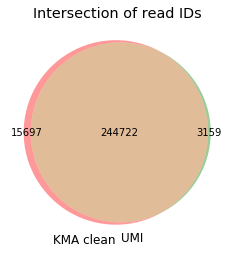

In [10]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2

a = set(map_df.query_id.values)
b = set(umi_df.query_id.values)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Venn of MHC annotations"
venn2(subsets = (a_b, b_a, ab), set_labels = ('KMA clean', 'UMI'))
title = "Intersection of read IDs"
plt.title(title)
#plt.savefig(FIG_SUND + "v%i.%i.raw.pdf" %(version, name), bbox_inches='tight')
plt.show()

# Distribution of read counts for each length of UMI

In [15]:
umi_df['A6'] = umi_df.A_N6.apply(lambda x: True if len(x)==6 else False)
umi_df['A5'] = umi_df.A_N6.apply(lambda x: True if len(x)==5 else False)
umi_df['A4'] = umi_df.A_N6.apply(lambda x: True if len(x)==4 else False)
umi_df['A3'] = umi_df.A_N6.apply(lambda x: True if len(x)==3 else False)
umi_df['A2'] = umi_df.A_N6.apply(lambda x: True if len(x)==2 else False)
umi_df['A1'] = umi_df.A_N6.apply(lambda x: True if len(x)==1 else False)
umi_df['A0'] = umi_df.A_N6.apply(lambda x: True if len(x)==0 else False)

In [16]:
umi_df['B6'] = umi_df.B_N6.apply(lambda x: True if len(x)==6 else False)
umi_df['B5'] = umi_df.B_N6.apply(lambda x: True if len(x)==5 else False)
umi_df['B4'] = umi_df.B_N6.apply(lambda x: True if len(x)==4 else False)
umi_df['B3'] = umi_df.B_N6.apply(lambda x: True if len(x)==3 else False)
umi_df['B2'] = umi_df.B_N6.apply(lambda x: True if len(x)==2 else False)
umi_df['B1'] = umi_df.B_N6.apply(lambda x: True if len(x)==1 else False)
umi_df['B0'] = umi_df.B_N6.apply(lambda x: True if len(x)==0 else False)

In [17]:
umi_df['N12'] = umi_df.umi.apply(lambda x: True if len(x)==12 else False)
umi_df['N11'] = umi_df.umi.apply(lambda x: True if len(x)==11 else False)
umi_df['N10'] = umi_df.umi.apply(lambda x: True if len(x)==10 else False)
umi_df['N9'] = umi_df.umi.apply(lambda x: True if len(x)==9 else False)
umi_df['N8'] = umi_df.umi.apply(lambda x: True if len(x)==8 else False)
umi_df['N7'] = umi_df.umi.apply(lambda x: True if len(x)==7 else False)
umi_df['N6'] = umi_df.umi.apply(lambda x: True if len(x)==6 else False)
umi_df['N5'] = umi_df.umi.apply(lambda x: True if len(x)==5 else False)
umi_df['N4'] = umi_df.umi.apply(lambda x: True if len(x)==4 else False)
umi_df['N3'] = umi_df.umi.apply(lambda x: True if len(x)==3 else False)
umi_df['N2'] = umi_df.umi.apply(lambda x: True if len(x)==2 else False)
umi_df['N1'] = umi_df.umi.apply(lambda x: True if len(x)==1 else False)
umi_df['N0'] = umi_df.umi.apply(lambda x: True if len(x)==0 else False)

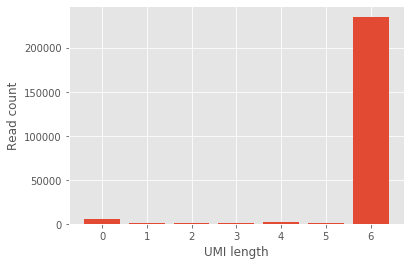

In [21]:
x = list(range(6, -1, -1))
yA= [umi_df.A6.sum(),
     umi_df.A5.sum(),
     umi_df.A4.sum(),
     umi_df.A3.sum(),
     umi_df.A2.sum(),
     umi_df.A1.sum(),
     umi_df.A0.sum()]

plt.bar(x,yA)
plt.xlabel("UMI length")
plt.ylabel("Read count")
plt.show()

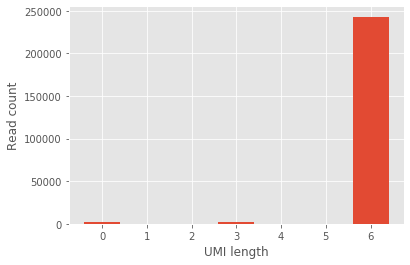

In [22]:
x = list(range(6, -1, -1))
yB= [umi_df.B6.sum(),
     umi_df.B5.sum(),
     umi_df.B4.sum(),
     umi_df.B3.sum(),
     umi_df.B2.sum(),
     umi_df.B1.sum(),
     umi_df.B0.sum()]

plt.bar(x,yB)
plt.xlabel("UMI length")
plt.ylabel("Read count")
plt.show()

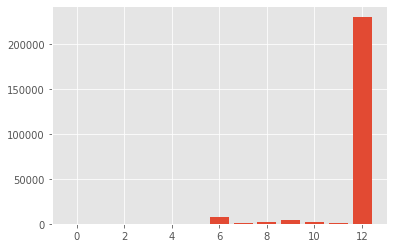

In [23]:
x = list(range(12, -1, -1))

y = [umi_df.N12.sum(),
     umi_df.N11.sum(),
     umi_df.N10.sum(),
     umi_df.N9.sum(),
     umi_df.N8.sum(),
     umi_df.N7.sum(),
     umi_df.N6.sum(),
     umi_df.N5.sum(),
     umi_df.N4.sum(),
     umi_df.N3.sum(),
     umi_df.N2.sum(),
     umi_df.N1.sum(),
     umi_df.N0.sum()]

plt.bar(x,y)
plt.show()

# Distribution of read counts across lengths of UMIs

In [67]:
umi_df['A6'] = umi_df.A_N6.apply(lambda x: True if len(x)==6 else False)
umi_df['A5'] = umi_df.A_N6.apply(lambda x: True if len(x)>=5 else False)
umi_df['A4'] = umi_df.A_N6.apply(lambda x: True if len(x)>=4 else False)
umi_df['A3'] = umi_df.A_N6.apply(lambda x: True if len(x)>=3 else False)
umi_df['A2'] = umi_df.A_N6.apply(lambda x: True if len(x)>=2 else False)
umi_df['A1'] = umi_df.A_N6.apply(lambda x: True if len(x)>=1 else False)

In [68]:
umi_df['B6'] = umi_df.B_N6.apply(lambda x: True if len(x)==6 else False)
umi_df['B5'] = umi_df.B_N6.apply(lambda x: True if len(x)>=5 else False)
umi_df['B4'] = umi_df.B_N6.apply(lambda x: True if len(x)>=4 else False)
umi_df['B3'] = umi_df.B_N6.apply(lambda x: True if len(x)>=3 else False)
umi_df['B2'] = umi_df.B_N6.apply(lambda x: True if len(x)>=2 else False)
umi_df['B1'] = umi_df.B_N6.apply(lambda x: True if len(x)>=1 else False)

In [69]:
umi_df['N12'] = umi_df.umi.apply(lambda x: True if len(x)==12 else False)
umi_df['N11'] = umi_df.umi.apply(lambda x: True if len(x)>=11 else False)
umi_df['N10'] = umi_df.umi.apply(lambda x: True if len(x)>=10 else False)
umi_df['N9'] = umi_df.umi.apply(lambda x: True if len(x)>=9 else False)
umi_df['N8'] = umi_df.umi.apply(lambda x: True if len(x)>=8 else False)
umi_df['N7'] = umi_df.umi.apply(lambda x: True if len(x)>=7 else False)
umi_df['N6'] = umi_df.umi.apply(lambda x: True if len(x)>=6 else False)
umi_df['N5'] = umi_df.umi.apply(lambda x: True if len(x)>=5 else False)
umi_df['N4'] = umi_df.umi.apply(lambda x: True if len(x)>=4 else False)
umi_df['N3'] = umi_df.umi.apply(lambda x: True if len(x)>=3 else False)
umi_df['N2'] = umi_df.umi.apply(lambda x: True if len(x)>=2 else False)
umi_df['N1'] = umi_df.umi.apply(lambda x: True if len(x)>=1 else False)

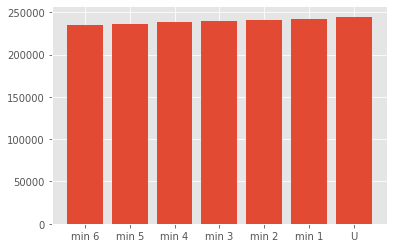

In [72]:
x = ["min " + str(i) for i in range(6, 0, -1)] + ["U"]
yA= [umi_df.A6.sum(),
     umi_df.A5.sum(),
     umi_df.A4.sum(),
     umi_df.A3.sum(),
     umi_df.A2.sum(),
     umi_df.A1.sum(),
     ab]

plt.bar(x,yA)
plt.show()

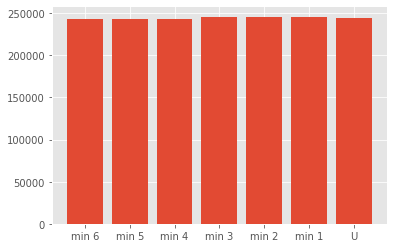

In [73]:
x = ["min " + str(i) for i in range(6, 0, -1)] + ["U"]

yB= [umi_df.B6.sum(),
     umi_df.B5.sum(),
     umi_df.B4.sum(),
     umi_df.B3.sum(),
     umi_df.B2.sum(),
     umi_df.B1.sum(),
     ab]

plt.bar(x,yB)
plt.show()

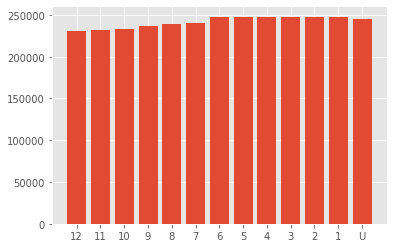

In [74]:
x = [str(i) for i in range(12, 0, -1)] + ["U"]

y = [umi_df.N12.sum(),
     umi_df.N11.sum(),
     umi_df.N10.sum(),
     umi_df.N9.sum(),
     umi_df.N8.sum(),
     umi_df.N7.sum(),
     umi_df.N6.sum(),
     umi_df.N5.sum(),
     umi_df.N4.sum(),
     umi_df.N3.sum(),
     umi_df.N2.sum(),
     umi_df.N1.sum(),
     ab]

plt.bar(x,y)
plt.show()

In [75]:
umi_df.N1.sum()

247872

In [76]:
umi_df.shape

(247881, 29)

In [78]:
map_df = map_df[(map_df.credible_alignment == True) & (map_df.barcode.str.contains(BARCODE_SYSTEM_REGEX))]
map_df = pd.merge(map_df, umi_df[['query_id', 'umi']], on='query_id', how='left')

# Intersection between credible KMA read IDs and UMI read IDs

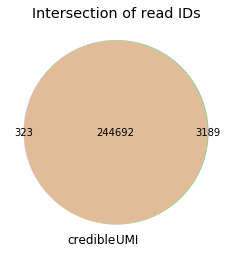

In [79]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2

a = set(map_df.query_id.values)
b = set(umi_df.query_id.values)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Venn of MHC annotations"
venn2(subsets = (a_b, b_a, ab), set_labels = ('credible', 'UMI'))
title = "Intersection of read IDs"
plt.title(title)
#plt.savefig(FIG_SUND + "v%i.%i.raw.pdf" %(version, name), bbox_inches='tight')
plt.show()

# Intersection between KMA GEMs and UMI GEMs

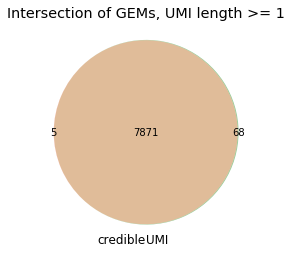

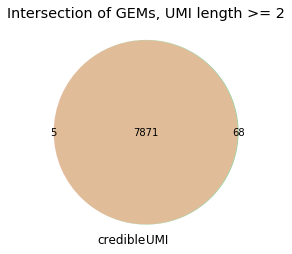

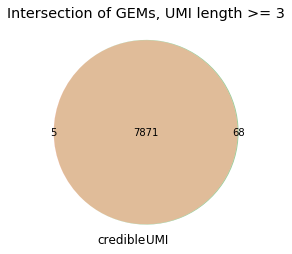

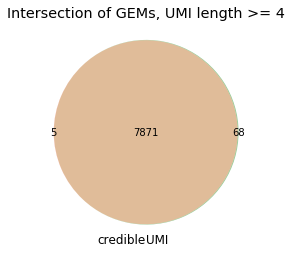

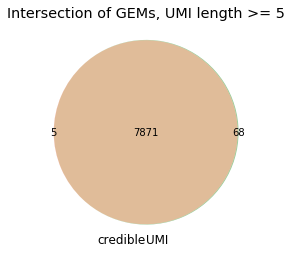

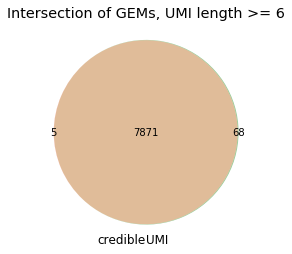

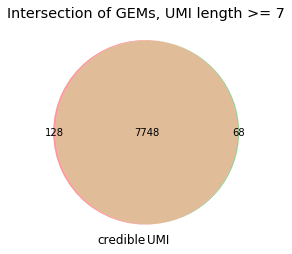

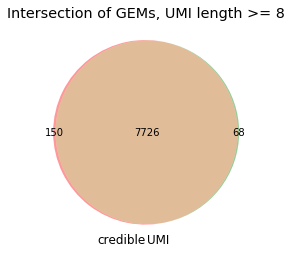

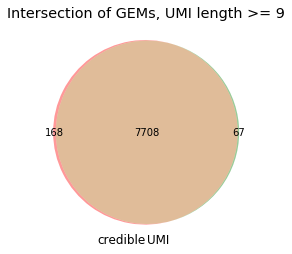

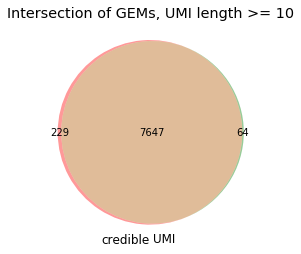

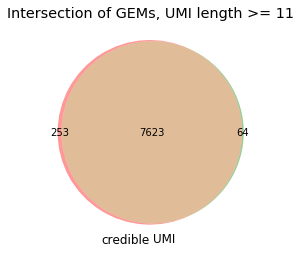

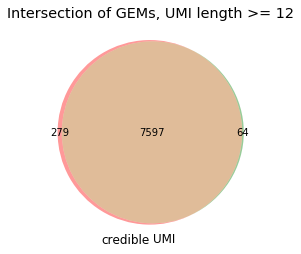

In [85]:
for i in range(1, 13):
    a = set(map_df.gem.values)
    b = set(umi_df[umi_df["N%i"%i]==True].gem.values)

    ab = len(a.intersection(b))
    a_b = len(a) - ab
    b_a = len(b) - ab

    title = "N %i" %i
    venn2(subsets = (a_b, b_a, ab), set_labels = ('credible', 'UMI'))
    title = "Intersection of GEMs, UMI length >= %i" %i
    plt.title(title)
    #plt.savefig(FIG_SUND + "v%i.%i.raw.pdf" %(version, name), bbox_inches='tight')
    plt.show()

# Distribution of read counts for reads with full UMI (length 12)

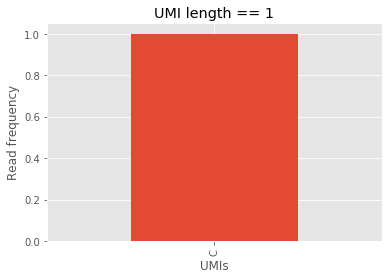

count     1
unique    1
top       C
freq      1
Name: umi, dtype: object
count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: umi, dtype: float64


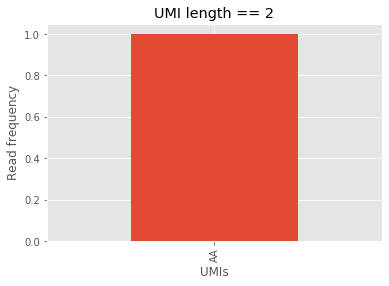

count      1
unique     1
top       AA
freq       1
Name: umi, dtype: object
count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: umi, dtype: float64


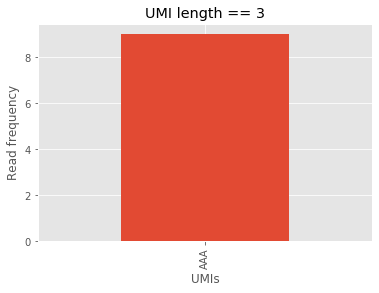

count       9
unique      1
top       AAA
freq        9
Name: umi, dtype: object
count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: umi, dtype: float64


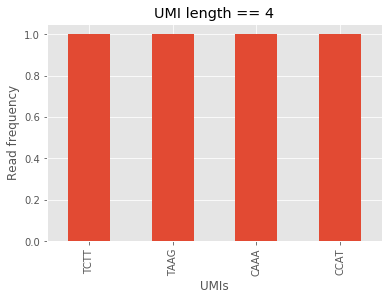

count        4
unique       4
top       TCTT
freq         1
Name: umi, dtype: object
count    4.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: umi, dtype: float64


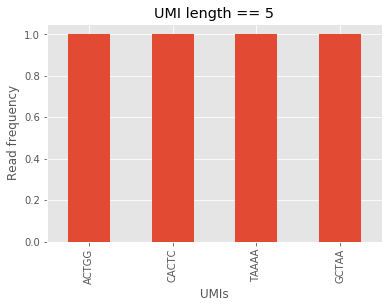

count         4
unique        4
top       ACTGG
freq          1
Name: umi, dtype: object
count    4.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: umi, dtype: float64


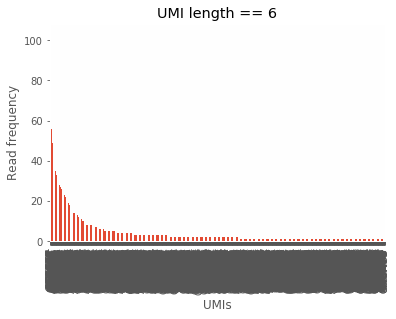

count       7738
unique      1750
top       CCACTC
freq         103
Name: umi, dtype: object
count    1750.000000
mean        4.421714
std         8.347470
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       103.000000
Name: umi, dtype: float64


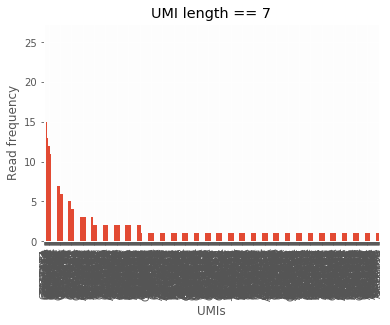

count        1345
unique        699
top       CGCAAAG
freq           26
Name: umi, dtype: object
count    699.000000
mean       1.924177
std        2.459116
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       26.000000
Name: umi, dtype: float64


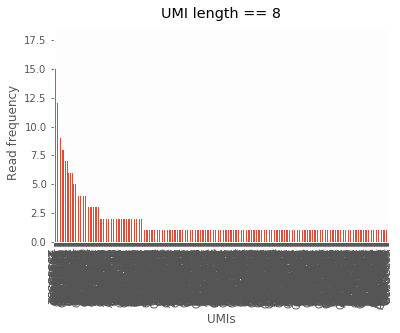

count         1453
unique         801
top       ACCCACGT
freq            18
Name: umi, dtype: object
count    801.000000
mean       1.813983
std        2.134035
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       18.000000
Name: umi, dtype: float64


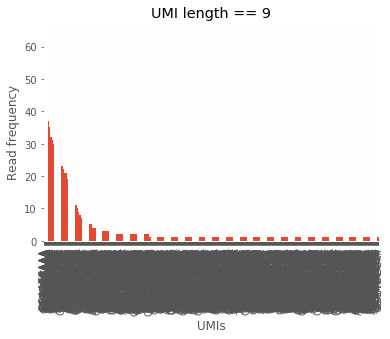

count          3930
unique          980
top       GGAATCAAA
freq             64
Name: umi, dtype: object
count    980.000000
mean       4.010204
std        8.327189
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       64.000000
Name: umi, dtype: float64


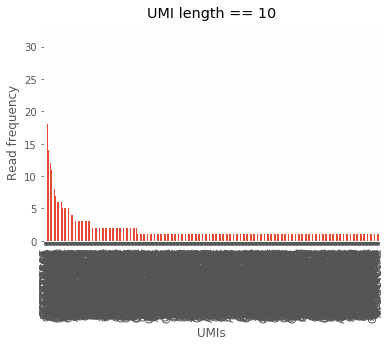

count           1756
unique           907
top       GCGATCTAAA
freq              32
Name: umi, dtype: object
count    907.000000
mean       1.936053
std        2.833942
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       32.000000
Name: umi, dtype: float64


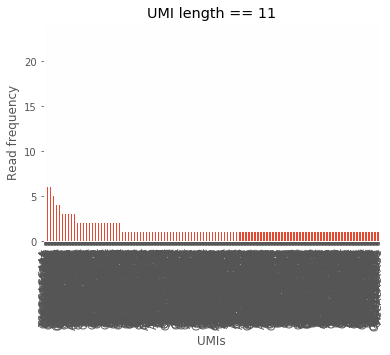

count            1336
unique            893
top       CCCCGCGAGGA
freq               23
Name: umi, dtype: object
count    893.000000
mean       1.496081
std        1.565189
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       23.000000
Name: umi, dtype: float64


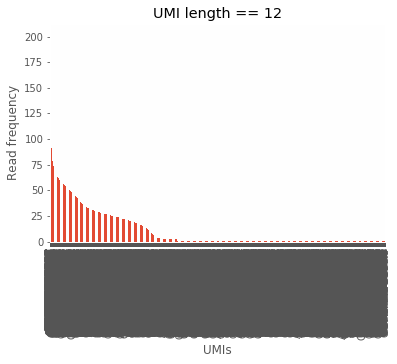

count           230295
unique           20701
top       TTGTCCGCCCCG
freq               202
Name: umi, dtype: object
count    20701.000000
mean        11.124825
std         18.514832
min          1.000000
25%          1.000000
50%          1.000000
75%         19.000000
max        202.000000
Name: umi, dtype: float64


In [95]:
for i in range(1, 13):
    umi_df[umi_df.umi.str.len() == i].umi.value_counts().plot(kind='bar')
    plt.title("UMI length == %i" %i)
    plt.xlabel("UMIs")
    plt.ylabel('Read frequency')
    plt.show()
    
    print(umi_df[umi_df.umi.str.len() == i].umi.describe())
    print(umi_df[umi_df.umi.str.len() == i].umi.value_counts().describe())

In [87]:
umi_df[umi_df.N12==True].umi.describe()

count           230295
unique           20701
top       TTGTCCGCCCCG
freq               202
Name: umi, dtype: object

In [88]:
umi_df[umi_df.N12==True].umi.value_counts().describe()

count    20701.000000
mean        11.124825
std         18.514832
min          1.000000
25%          1.000000
50%          1.000000
75%         19.000000
max        202.000000
Name: umi, dtype: float64

In [93]:
umi_df[umi_df.umi.str.len() == 7]

,query_id,gem,A_N6,B_N6,umi,A6,A5,A4,A3,A2,...,N10,N9,N8,N7,N6,N5,N4,N3,N2,N1
0,HBBAF:03518:01259,GCTGCAGGTACCGCTG-1,A,TCGTTG,ATCGTTG,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
5,HBBAF:02744:01396,GCTGCAGGTACCGCTG-1,A,TCGTTG,ATCGTTG,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
18,HBBAF:01298:02869,GCTGCAGGTACCGCTG-1,A,TCGTTG,ATCGTTG,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
126,HBBAF:02424:02715,ACTGAGTAGAATAGGG-1,A,ACGTAC,AACGTAC,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1258,HBBAF:02601:02065,CATATTCGTCTTTCAT-1,A,GGCGGG,AGGCGGG,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1405,HBBAF:03668:01371,GCATACACATACGCCG-1,A,TTCTAT,ATTCTAT,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1406,HBBAF:03403:01886,GCATACACATACGCCG-1,A,TTCTAT,ATTCTAT,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1410,HBBAF:03249:02558,GCATACACATACGCCG-1,A,TTCTAT,ATTCTAT,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1412,HBBAF:03111:01141,GCATACACATACGCCG-1,A,TTCTAT,ATTCTAT,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1414,HBBAF:02884:01394,GCATACACATACGCCG-1,A,TTCTAT,ATTCTAT,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
